## Drugs Arrested Case

### ปัจจัยที่ส่งผลต่อจำนวนคดีผู้ต้องหายาเสพติด
#### by กลุ่ม ทุกปัญหามีทางเข้าเสมอ
---

In [2]:
import pandas as pd
import numpy as np
import requests
import json, io, time, urllib3, re
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
urllib3.disable_warnings()

เกริ่นเรื่องปัญหายาเสพติดในไทย

- จำนวนคดีเคส เรียงตามจังหวัด เอาปีล่าสุด - เลือกจังหวัดแสดงผลได้
- ดูเทรนด์ rank top 3 แต่ละปี
- เอาจังหวัดที่น่าสนใจ(สถิติอยู่ในท็อป3บ่อย) ex.นครศรีธรรมราช กรุงเทพ ปทุม สงขลา ขอนแก่น
- ประชากรหนาแน่น ex.กรุงเทพ ขอนแก่น
- ดูเรื่องนักท่องเที่ยว ฟีลเมืองเศรษฐกิจ ex.ชลบุรี
- หัวข้อภาคใต้ เน้นนครศรี + เรื่องกระท่อม + อาชญากรรมอื่น
- การกินเหล้า & เล่นยาสวนทางกัน

### Overview

ปัญหายาเสพติดเป็นเหมือนโรคเรื้อรังที่กัดกินอนาคตของชาติไทยมานานหลายทศวรรษ แม้จะมีความพยายามจากทุกภาคส่วนในการแก้ไข แต่ปัญหานี้ยังคงฝังรากลึกในสังคมไทย

วันนี้กลุ่มของพวกเราจะมานำเสนอข้อมูลเกี่ยวกับยาเสพติด โดยเน้นไปที่จำนวนคดียาเสพติดในแต่ละจังหวัด พร้อมกับค้นหาว่าปัจจัยใดบ้างที่ส่งผลต่อจำนวนความมากน้อยของปัญหายาเสพติดได้ รวมไปถึงหยิบยก insights ที่น่าสนใจ ซึ่งเป็นสาเหตุที่ซ่อนอยู่ในตัวเลขยอดคดียาเสพติดของบางจังหวัดมานำเสนอเพิ่มเติม

*หมายเหตุ ข้อมูลจำนวนผู้ต้องหาคดียาเสพติดเป็นเพียงตัวเลขหนึ่งที่สะท้อนถึงปัญหายาเสพติด ว่ามีมากน้อยเพียงใด มิใช่ตัวเลขที่เป็นตัวแทนสะท้อนข้อมูลออกมาได้ทั้งหมด 


### จำนวนคดีผู้ต้องหาคดียาเสพติด เรียงตามจังหวัด ปี 2565

In [3]:
df = pd.read_csv("./data/arrested_drug_cases.csv", encoding = "utf8")
df["budgetYear"] = df["budgetYear"].astype(str)

df_prov_th_en = pd.read_csv("./data/province_th_en.csv", encoding = "utf8")
df = pd.merge(df, df_prov_th_en, on='PROV_NAME', how='left').copy()
df.head()

,Unnamed: 0_x,budgetYear,REG_ONCB,REG_NAME,PROV_ID,PROV_NAME,arrestAll_case,arrestAll_per,arrestTreat_case,arrestTreat_per,...,arrestImport_case,arrestImport_per,arrestExport_case,arrestExport_per,arrestJoincase_cas,arrestJoincase_per,arrest5Main_case,arrest5Main_per,Unnamed: 0_y,prov_en
0,0,2557,4,ปปส.ภาค 4,46,กาฬสินธุ์,4119,4341,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1073,1256,3,Kalasin
1,1,2557,4,ปปส.ภาค 4,40,ขอนแก่น,7408,7630,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1247,1431,5,Khon Kaen
2,2,2557,4,ปปส.ภาค 4,48,นครพนม,4511,4637,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,397,503,19,Nakhon Phanom
3,3,2557,4,ปปส.ภาค 4,38,บึงกาฬ,2605,2678,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,284,347,26,Bueng Kan
4,4,2557,4,ปปส.ภาค 4,44,มหาสารคาม,2709,2773,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,624,684,42,Maha Sarakham


- bar chart แสดงเปรียบเทียบ 10 จังหวัดที่มีจำนวนคดียาเสพติดสูงสุด ในปี 2565

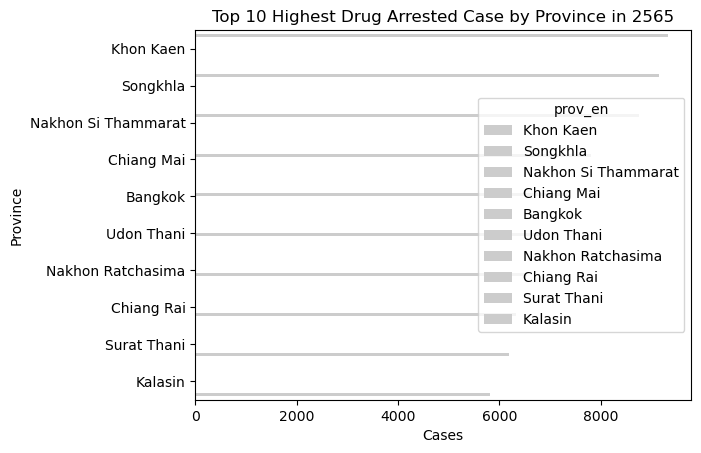

In [4]:
df_for_bar = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en']][df["budgetYear"] == "2565"].copy()
df_for_bar.sort_values("arrestAll_case", ascending = False, inplace = True)

df_top_x = df_for_bar[:10]

sns.barplot(
    data = df_top_x,
    x = "arrestAll_case",
    y = "prov_en",
    palette = ["#cccccc" for _ in range(len(df_top_x))], # just to eliminate warning
    hue = "prov_en",
)

plt.xlabel("Cases")
plt.ylabel("Province")
plt.title("Top 10 Highest Drug Arrested Case by Province in 2565")
plt.show()

- แยกดูรายจังหวัดทุกปีได้

In [6]:
df_interact_prov = df[['budgetYear', 'PROV_NAME', 'arrestAll_case', 'arrestAll_per', 'prov_en']].copy()
provinces = df_interact_prov["PROV_NAME"].to_list()

@interact
def bar_by_province(province = provinces):
    data = df_interact_prov[df["PROV_NAME"] == province]

    # average 2 years prior and after to fill the missing value
    avg = data[data["budgetYear"].isin(["2557", "2558", "2560", "2561"])]["arrestAll_case"].mean()
    data.loc[data["arrestAll_case"] == 0, "arrestAll_case"] = avg.astype(int)

    g = sns.barplot(
        data = data,
        x = "budgetYear",
        y = "arrestAll_case",
        palette = ["#cccccc" for _ in range(len(data))], # just to eliminate warning
        hue = "budgetYear",
    )

    prov_en = data["prov_en"].iloc[0]

    plt.ylabel("Cases")
    plt.xlabel("Year")
    plt.title(f"Number of Cases over the time in {prov_en}")

interactive(children=(Dropdown(description='province', options=('กาฬสินธุ์', 'ขอนแก่น', 'นครพนม', 'บึงกาฬ', 'ม…

#### Top 3 Province with Highest Drugs Arrested Case 

#### ปัจจัยความหนาแน่นประชากร

#### ปัจจัยทางเศรษฐกิจ การท่องเที่ยว

#### Southern Province Insights
พวกเราอาจเคยได้ยินข่าวเรื่องการลักลอบนำเข้าขนส่งยาเสพติดกันบ่อยๆ ตามแถบชายแดนติดฝั่งพม่า หรือทางฝั่งภาคเหนือ

แต่จากข้อมูลจะพบได้ว่าจังหวัดในภาคใต้ก็มีจำนวนปัญหายาเสพติดไม่น้อยหน้าเช่นกัน

โดนหนึ่งในสาเหตุที่ทำให้ยาเสพติดแพร่ระบาดเยอะคือกระบวรการค้ายาเสพติดถูกสกัดจับได้เพียงแค่ประมาณ

- ##### จังหวัด สงขลา 
    ในจังหวัดสงขลามีช่องทางสำหรับการลักลอบนำเข้ายาเสพติดจำนวนมาก ทั้งด่านที่เป็นด่านศุลการกร ด่นตรวจคนเข้าเมือง จุดตรวจพรมแดนต่างๆ รวมถึงมีช่องทางธรรมชาติ


#### Reversion of Drugs & Alcohol Consumption

ยาเสพติดและเครื่องดื่มแอลกอฮอล์ต่างก็เป็นสารเสพติดเช่นเดียวกัน ดังนั้นหลายคนจึงอาจจะคิดว่าปัญหายาเสพติดและปัญหาการบริโภคเครื่องดื่มแอลกอฮอล์นั้นควรจะมีแนวโน้มไปในทิศทางเดียวกัน ผู้ที่ติดยาเสพติดส่วนใหญ่ก็มีแนวโน้มที่จะติดสุราและดื่มเครื่องดื่มแอลกอฮอล์เป็นประจำด้วย 

รวมไปถึงผลสำรวจก็พบว่า การติดยาเสพติดโดยเฉพาะในกลุ่มวัยรุ่นจะเริ่มจากการดื่มเครื่องดื่มแอลกอฮอล์ การสูบบุหรี่ ก่อนจะนำไปสู่สารเสพติดชนิดอื่นๆที่มีความรุนแรงขึ้นเรื่อยๆ

แต่จากข้อมูลกลับมีจุดน่าสังเกตที่ว่า ภูมิภาคใต้ที่มีผู้ดื่มสุราหรือเครื่องดื่มแอลกอฮอล์และมีความเสี่ยงต่อปัญหาแอลกอฮอล์น้อยที่สุดกลับเป็นภูมิภาคที่มีคดียาเสพติดสูงที่สุด 
เช่น จังหวัดนครศรีธรรมราช จังหวัดสงขลา ซึ่งเป็นจังหวัดที่มีคดียาเสพติดสูงสุด 

ในทางกลับกัน จังหวัดที่อยู่ในภาคเหนือ เช่น แม่ฮ่องสอน แพร่ น่าน เชียงราย ที่มีปัญหายาเสพติดน้อย กลับเป็นจังหวัดที่มีความเสี่ยงต่อปัญหาแอลกอฮอล์สูงสุดในประเทศไทย

### ข้อเสนอแนะ

### References
- https://alcoholstudy.in.th/index.php?ct=report_drinker_province&proc=main&year=2564&chart_id=5&len=10&page=0&key=
- https://www.thaihealth.or.th/%E0%B8%AB%E0%B9%88%E0%B8%A7%E0%B8%87%E0%B8%9B%E0%B8%B1%E0%B8%8D%E0%B8%AB%E0%B8%B2%E0%B8%A2%E0%B8%B2%E0%B9%80%E0%B8%AA%E0%B8%9E%E0%B8%95%E0%B8%B4%E0%B8%94-%E0%B8%A3%E0%B8%B0%E0%B8%9A%E0%B8%B2%E0%B8%94/
- https://www.phufaresthome.com/blog/drug-issue-in-thai-teenager/
- https://www.agenda.co.th/social/alcohol-consumption-thailand/